In [1]:
import pandas as pd
import numpy as np
from function import *
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import PathPatch

/Users/lilimatic/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
df = pd.read_csv('data_sim.csv')
df.drop('Unnamed: 0',axis=1,inplace=True)

In [3]:
n = 10000

eps = 0 # np.random.normal(0, 0.1, n)

a = 2
b = 2

b0=0.5
b1 = 0.5

sim = 10000


In [4]:
#df = df[:n]

In [5]:
#df   = pd.DataFrame(np.random.uniform(0,1,size=(n, 3)),columns=['X1','X2','X3'])

#df.to_csv('data_sim.csv')  

In [6]:
omega = pd.DataFrame(np.random.binomial(size=n, n=1, p= 0.7),columns=['X2'])

In [7]:
def singleton(df,Xi,n,p,sample):
    omega = pd.DataFrame(np.random.binomial(size=n, n=1, p= p),columns=[Xi])
    omega[df.drop([Xi],axis=1).columns]=  np.ones((n,2),dtype=int)
    cc = df.where(omega==1,np.nan).dropna()
    print(len(cc))
    single_sobol_cc = singletons(cc,len(cc),sim,a,b,eps)
    #fig, ax = plt.subplots()
    #ax.boxplot(single_sobol_cc)
    #ax.set_xticklabels(single_sobol_cc.columns)
    single_sobol_cc['sample'] = sample
    return single_sobol_cc


10000
9137
8984
8930
9220
9417
9225
9328
X1 is missing


<ipython-input-8-637b63c796cc>:38: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('flare_r'),showfliers = False) #"Blues" "cubehelix" flare_r'


10000
9108
9007
8959
9215
9436
9201
9336
X2 is missing


<ipython-input-8-637b63c796cc>:38: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('flare_r'),showfliers = False) #"Blues" "cubehelix" flare_r'


10000
9056
8971
8881
9218
9373
9208
9303
X3 is missing


<ipython-input-8-637b63c796cc>:38: UserWarning: 
The palette list has fewer values (6) than needed (8) and will cycle, which may produce an uninterpretable plot.
  ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('flare_r'),showfliers = False) #"Blues" "cubehelix" flare_r'


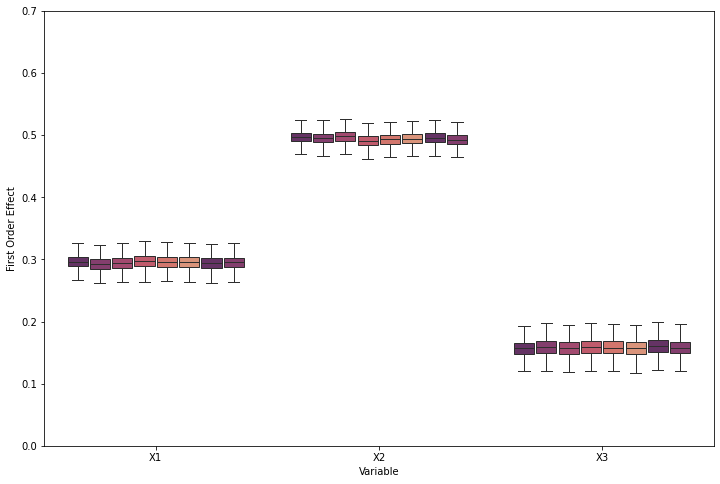

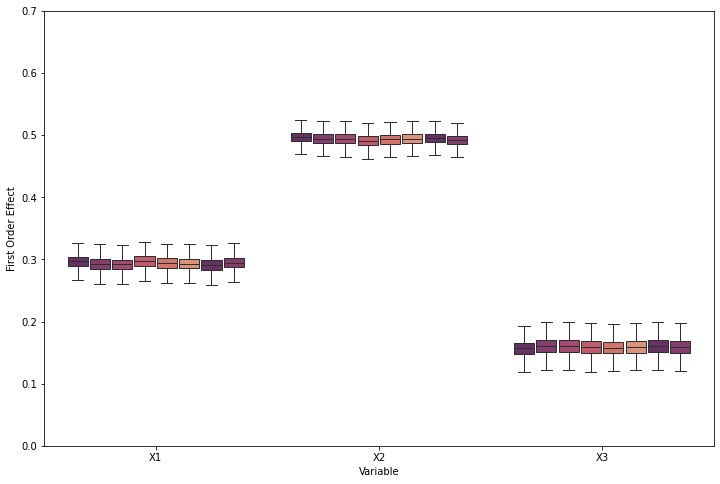

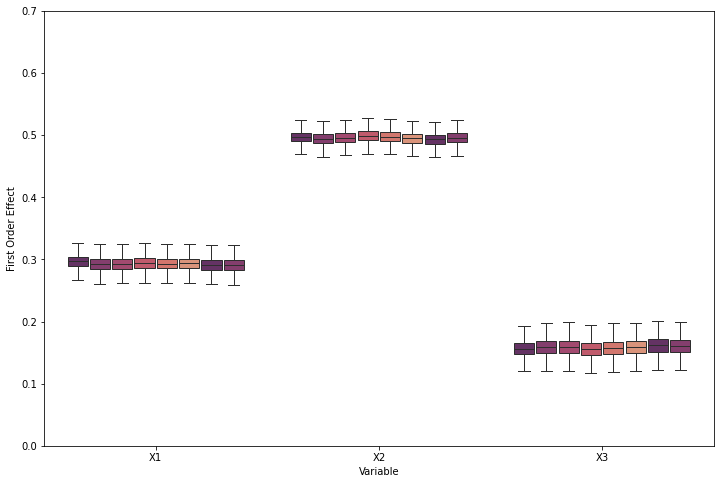

In [8]:
p = 0.9 #0.4, 0.7
b0=1.5 #-0.2, 0.5
b1 = 1.5 #-0.2, 0.5


for x in ['X1','X2','X3']:
    single_sobol = singleton(df,x,n,1,'complete')
    #single_sobol_cc = singleton(df,x,n,p,'cc')

    
    y = dataset(n,df.copy()).ishigami(eps)(a,b)

    single_sobol_cc_y = singleton(df,x,n,pi(0.5*y,b0,b1),'mar_y')

    single_sobol_cc_xj = singleton(df,x,n,pi(df[df.drop([x],axis=1).columns[0]],b0,b1),'mar_xk')

    single_sobol_cc_xk = singleton(df,x,n,pi(df[df.drop([x],axis=1).columns[1]],b0,b1),'mar_xj')

    single_sobol_cc_xx = singleton(df,x,n,pi(0.7*df[df.drop([x],axis=1).columns].sum(axis=1),b0,b1),'mar_x')
    
    single_sobol_cc_xxy = singleton(df,x,n,pi(0.4*y + 0.5 *df[df.drop([x],axis=1).columns].sum(axis=1),b0,b1),'mar_xxy')
    
    single_sobol_cc_yxj = singleton(df,x,n,pi(0.4*y + 0.5 * df[df.drop([x],axis=1).columns[0]],b0,b1),'mar_xky')
    
    single_sobol_cc_yxk = singleton(df,x,n,pi(0.5*y + 0.5 * df[df.drop([x],axis=1).columns[1]],b0,b1),'mar_xjy')
    
    print(x+ ' is missing')
    cdf = pd.concat([single_sobol, #single_sobol_cc,
                    single_sobol_cc_y,single_sobol_cc_xj,single_sobol_cc_xk,single_sobol_cc_xx,single_sobol_cc_xxy,
                    single_sobol_cc_yxj,single_sobol_cc_yxk],axis=0)  
    
    dd = pd.melt(cdf, id_vars= ['sample'],value_vars=['X1','X2','X3'],var_name='Variable')
    dd = dd.rename(columns={'value':'First Order Effect'})
    dd.to_csv(f'simulation/mar_run/{x}_{p}.csv')
 
    fig, ax = plt.subplots(1, 1,figsize=(12, 8))
    
    ax = sns.boxplot(x='Variable',y='First Order Effect',data=dd,hue='sample',palette=sns.color_palette('flare_r'),showfliers = False) #"Blues" "cubehelix" flare_r'
    ax.legend_.remove()
    ax.set(ylim=(0, 0.7))
    fig = ax.get_figure()
    adjust_box_widths(fig, 0.9)
    fig.savefig(f'simulation/mar/MAR_{x}_10k_{p}.pdf',transparent=True,bbox_inches='tight')
